# Classification de textes Francais par entreprise

# Recuperation de donnée avec label

In [1]:
# imports
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
from copy import deepcopy
import ast
from scipy import stats

In [2]:
# fetching data
PATH = "./data/ArticleCompany_2020-11-17/"
coprus = "corpus_check_long_SIREN_UPDATED2"
names = "siren_name_map_clean"

with open(PATH + names +".json") as json_file: 
    dict_names = json.load(json_file) 

with open(PATH + coprus +".json") as json_file: 
    corpus_list = json.load(json_file) 

In [3]:
# Convert string to list of labels
print ("The siren list is:",type(corpus_list[0]["siren"]))
for document in corpus_list:
    document["siren"] = ast.literal_eval(document["siren"]) # convert list in string format to list
    for i in range(len(document["siren"])): # Convert each int siren to string 
        document["siren"][i] = str(document["siren"][i])
print ("NOW the type of the siren list is:",type(corpus_list[0]["siren"]))

The siren list is: <class 'str'>
NOW the type of the siren list is: <class 'list'>


In [4]:
for document in corpus_list:
    for siren in document['siren']:
        if len(siren)>10:
            print(siren)
            print (document['siren'])
            print ("--------")

In [5]:
print ("There are", len(corpus_list), "articles in the corpus")
print ("There are", len(dict_names), "companies in the list")

There are 57540 articles in the corpus
There are 30178 companies in the list


## Compter Nombre d'Entreprises sans Articles

In [6]:
dict_count = dict()
#for company in dict_names.keys(): dict_count[company] = 0
for document in corpus_list:
    sir_list = document["siren"]
    for siren in sir_list:
        if len(siren)>10: # Should not be triggered
            print ("ALERT:",siren)
        if siren in dict_count.keys():
            dict_count[siren] +=1
        else:
            dict_count[siren] = 1
print ("There are",len(dict_count.keys()),"companies with labels out of the", len(dict_names.keys()), "companies")
print ("there are",len(dict_names.keys())-len(dict_count.keys()),"companies with no articles")
print (round(len(dict_count)/(len(dict_names))*100,2),"% of the companies have articles")
print ("Each article of the corpus has:",corpus_list[0].keys())
#corpus_list[0]["corpus"]

There are 28690 companies with labels out of the 30178 companies
there are 1488 companies with no articles
95.07 % of the companies have articles
Each article of the corpus has: dict_keys(['id', 'siren', 'corpus', 'url_article'])


## Quels sont les entreprises sans articles?

In [7]:
dict_no_acticle_companies = dict()
for company in dict_names.keys():
    if company not in dict_count.keys():
        dict_no_acticle_companies[company] = dict_names[company] 

In [8]:
for key in dict_count.keys():
    if len(key)>10:
        print (key)

## Quels sont les entreprise avec 2 tags ou plus

In [9]:
multiple_siren = 0
multiple_siren_list = list()
for document in corpus_list:
    if len(document["siren"])==0:
        print ("ALERT article sans tag, id:",document["id"])
    if len(document["siren"])>1:
        multiple_siren +=1
    multiple_siren_list.append(len(document["siren"]))
    
print(stats.describe(multiple_siren_list))   
print ("There are",multiple_siren,"arcticles with more that one tag out of the",len(corpus_list),"articles")        

DescribeResult(nobs=57540, minmax=(1, 29), mean=1.2476190476190476, variance=0.6042149465497106, skewness=8.134111908500053, kurtosis=136.5727450895893)
There are 9362 arcticles with more that one tag out of the 57540 articles


## Etudes du nombre d'articles associer a chaque entreprise 

In [10]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

DescribeResult(nobs=28690, minmax=(1, 175), mean=2.502195887068665, variance=28.018556298899046, skewness=11.346985559301654, kurtosis=211.55000716780165)
There are 63.58 % articles with one associated article
There are 90.42 % articles with less than 5 associated article


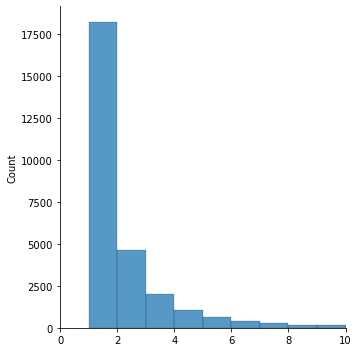

In [11]:
# On prendre seulement les entreprises avec au moins un articles associer
#sns.set(rc={'figure.figsize':(40,5)})
values = list(dict_count.values())
sns.displot(values, binwidth=1) #bins=20
plt.xlim(0, 10)

number = 5
print(stats.describe(values))
print ("There are",round(values.count(1)/len(values)*100,2), "% articles with one associated article")
under_n = [1 for i in values if i < number]
print ("There are",round(len(under_n)/len(values)*100,2), "% articles with less than",number,"associated article")

# Tokenize et suppression de stop words du corpus

In [12]:
#imports
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
stop_words = stopwords.words('french')

In [13]:
print ("Number of stop words",len(stop_words ))
print ("Ex:",stop_words[:5])

Number of stop words 157
Ex: ['au', 'aux', 'avec', 'ce', 'ces']


In [14]:
corpus_cleaned = deepcopy(corpus_list)
for document in tqdm(corpus_cleaned):
    plain_text = document["corpus"]
    plain_text = plain_text.lower()
    plain_text= re.sub(r'\s+', ' ', plain_text)
    #plain_text = re.sub("[^a-z0-9]", ' ', plain_text)
    plain_text = re.sub("[^a-z]", ' ', plain_text)
    plain_text = re.sub(r'\s+', ' ', plain_text)
    #remove one letter words?
    #remove numbers?
    pt_words = word_tokenize(plain_text)
    cleaned_words =list()
    for word in pt_words:
        if len(word)>1:
            if word not in stop_words:
                cleaned_words.append(word)
    document["corpus"] = cleaned_words
# 100%|██████████| 57540/57540 [03:30<00:00, 273.74it/s]

100%|██████████| 57540/57540 [03:13<00:00, 298.07it/s]


# Tokenize en gardant que les Noms 

# Extraction d'entreprise avec plus de n articles sur elles

In [15]:
print(list(dict_names.keys())[0:5])
print (dict_names['399258755'])
name_search = "APPLE FRANCE"
for siren, name in dict_names.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if name_search in name:
        print(siren, name)
print("APPLE FRANCE a",dict_count["322120916"],"articles dans le corpus")

['419838529', '813883964', '572060333', '542104245', '399258755']
SPIE OPERATIONS
322120916 APPLE FRANCE
APPLE FRANCE a 7 articles dans le corpus


In [16]:
number = 5 # Number of articles a company must have to be kept in the list
siren_filtered =[key for key in dict_count if dict_count[key] > number]
print ("There are",len(siren_filtered),"companies with MORE than",number,"associated articles")

There are 2084 companies with MORE than 5 associated articles


In [17]:
for key in siren_filtered:
    if len(key)>10:
        print (key)
#find out why label_dict

# Creation de Train et Test set pour l'entrainement de Tf.Idf

In [18]:
#from sklearn.model_selection import train_test_split
import random

In [19]:
# Remove all of the articles that dont talk about our selected companies (in siren filtered)
# Split corpus train/test
corpus = corpus_cleaned
train_size = 0.7
X_train_corpus = list()
X_test_corpus = list()

#Removing unwanted articles
print("Removing unwanted articles")
corpus_temp = list()
for document in corpus:
    keep = False
    for document_sirens in document["siren"]:
        for sirens in siren_filtered:
            if document_sirens == sirens:
                keep = True
    if keep:
        corpus_temp.append(document)
print ("We removed:",len(corpus)-len(corpus_temp),"articles and we have",len(corpus_temp),"left")
corpus = corpus_temp
 
#Splitting data
print("Splitting data") 
for document in corpus:
    if (random.uniform(0, 1)<train_size):
        X_train_corpus.append(document)
    else:
        X_test_corpus.append(document)
print ("We have",len(X_train_corpus),"documents in the training corpus")
print ("We have",len(X_test_corpus),"documents in the testing corpus")

Removing unwanted articles
We removed: 29189 articles and we have 28351 left
Splitting data
We have 19845 documents in the training corpus
We have 8506 documents in the testing corpus


# Tf.Idf pour une liste d'entreprise sur le training data

In [20]:
# imports
from sklearn.feature_extraction.text import TfidfVectorizer 

In [24]:
# Tf.Idf on Companies that have Associated Articles 

relevant_words_tfidf = {}
corpus = X_train_corpus # corpus

list_siren = siren_filtered

def identity_tokenizer(text):
    return text
for siren in tqdm(list_siren):
    #siren = "322120916" #APPLE FRANCE
    plain_text_list = list()
    company_article = list()
    #binary = True
    #sublinear_tf=False
    tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, ngram_range = (1,1), lowercase=False, sublinear_tf=True)
    for document in corpus:
        if siren in document["siren"]:
            company_article = company_article+document["corpus"]  # add article to company BIG article
        else:
            plain_text_list.append(document["corpus"]) # otherwise add to corpus

    plain_text_list.insert(0,company_article) # add company article to begging of corpus
    tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(plain_text_list)

    #Get the tf-idf scores for the words in the company article complication.
    first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] # discard tf.idf scores for the other texts

    # place tf-idf values in a pandas data frame 
    df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) 
    df = df.sort_values(by=["tfidf"],ascending=False).head(40) # Take top 40 words

    relevant_words_tfidf[siren] = list(zip(list(df.index),list(df["tfidf"])))
    #print (relevant_words_tfidf[company])

#100%|██████████| 100/100 [22:35<00:00, 13.55s/it]
#100%|██████████| 2084/2084 [2:19:42<00:00,  4.02s/it] 
#100%|██████████| 2084/2084 [2:03:31<00:00,  3.56s/it] # binary
#100%|██████████| 2084/2084 [1:50:00<00:00,  3.17s/it] # sublinear_tf

100%|██████████| 2084/2084 [1:50:00<00:00,  3.17s/it]


In [ ]:
relevant_words_tfidf

In [108]:
# load dictionary 
PATH = "./relevant_words/francais/"
file = "relevant_words_tfidf_5articles_sublinear_tf"
a_file = open(PATH + file + ".json", "r")
relevant_words_tfidf = json.load(a_file)
#relevant_words_tfidf = dict(relevant_words_tfidf)
# check if well loaded
print (file,"is loaded successfully") 

relevant_words_tfidf_5articles_sublinear_tf is loaded successfully


In [18]:
#relevant_words_tfidf.keys()
#relevant_words_tfidf['419838529']
#type(relevant_words_tfidf)

# Fetching Relevant Words from ES

# Text Classifier

In [110]:
# imports
import operator

In [111]:
#################################################################
# CLEANING PLAIN TEXT
#Input  : Plain text - String
#Output : Text removing all punctuation and lowercased
#################################################################
def clean_plain_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub("[^a-z0-9]", ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [125]:
#################################################################
# Gives a companies "related score" wrt an article (using it's significant words)
#INPUT :plain_text- String/ word_list - list of significant words
#OUTPUT: Score the chances the company is related to the article
#################################################################
def score_company(plain_text, word_list): 
    epsilon = 0.0001
    avg_word_length =6+1 #+1 counting the spaces
    n_words = len(word_list)
    words_in_text = 0
    #print (word_list)
    for word in word_list:
        words_in_text +=plain_text.count(word)
    #return words_in_text
    return words_in_text/(len(plain_text)/avg_word_length + epsilon)

In [113]:
#################################################################
# For an Article, gives the "related scores" for all companies
#INPUT :plain_text- String/company related words - dict/ params
#OUTPUT: dict of companies and their "related scores"
#################################################################
def text_label_scores(plain_text,related_words,n_sig_words=10, min_score = 0.01):
    label_dict = {}
    #print (sig_words_list)
    for siren in related_words.keys():
        #print("Company", company)
        sig_words_list = np.array(relevant_words_tfidf[siren])[:n_sig_words,0] # Build significant word list (with no scores)
        #print ("sig_words_list")
        score = score_company(plain_text, sig_words_list)
        #print (score)
        if score>=min_score:
            label_dict[siren]= score
    ### Soft_max ###
    #sum_exp = sum([np.exp(v) for v in label_dict.values()])
    #label_dict = {k: np.exp(v)/sum_exp for k, v in sorted(label_dict.items(), key=lambda item: -item[1])}
    ### normalizing score ###
    #max_val = max(label_dict.values())
    #label_dict = {k: v/max_val for k, v in sorted(label_dict.items(), key=lambda item: -item[1])}
    ### Plain score ###
    label_dict = {k: v for k, v in sorted(label_dict.items(), key=lambda item: -item[1])}
    return label_dict

In [120]:
# testing text_label_scores
plain_text = """
The New York Times said on Monday that it was exiting its partnership with Apple News, as news organizations struggle to compete with large tech companies for readers’ attention and dollars.

Starting on Monday, Times articles were no longer appearing alongside those from other publications in the curated Apple News feed available on Apple devices.

The Times is one of the first media organizations to pull out of Apple News. The Times, which has made adding new subscribers a key business goal, said Apple had given it little in the way of direct relationships with readers and little control over the business. It said it hoped to instead drive readers directly to its own website and mobile app so that it could “fund quality journalism.”

“Core to a healthy model between The Times and the platforms is a direct path for sending those readers back into our environments, where we control the presentation of our report, the relationships with our readers and the nature of our business rules,” Meredith Kopit Levien, chief operating officer, wrote in a memo to employees. “Our relationship with Apple News does not fit within these parameters.”

An Apple spokesman said that The Times “only offered Apple News a few stories a day,” and that the company would continue to provide readers with trusted information from thousands of publishers.

“We are also committed to supporting quality journalism through the proven business models of advertising, subscriptions and commerce,” he said."
"""
plain_text = clean_plain_text(plain_text)

related_words = relevant_words_tfidf
n_sig_words= 10
min_score = 0.1 # nbr of sig words in text
#print (plain_text)
label_dict = text_label_scores(plain_text,related_words, n_sig_words, min_score)
print(label_dict)
for key in label_dict.keys(): # Should not trigger
    if len(key)>10:
        print (key)
#find out why label_dict

{'510302953': 0.13433858807402332, '500034574': 0.1199451679232351, '802798975': 0.1199451679232351, '515151447': 0.1199451679232351, '412460354': 0.1151473612063057, '502240625': 0.1151473612063057, '450804364': 0.1151473612063057, '323159715': 0.1151473612063057, '489869321': 0.1151473612063057, '532501848': 0.10555174777244689, '320050859': 0.10555174777244689}


# Function to return predicted text labels

In [121]:
#################################################################
# For an Article, predicts the labels (sirens)
#INPUT : plain_text- String/company related words - dict/ params
#OUTPUT: dict of companies and their "related scores"
#################################################################
def label_text(plain_text,related_words, n_sig_words= 10, min_score = 0.1):
    label_dict = text_label_scores(plain_text,related_words, n_sig_words, min_score)
    #print("best score",label_dict[list(label_dict.keys())[0]])
    sirens = list(label_dict.keys())
    return sirens[:8] # limiting the number of predictions to 8

# Testing accuracy of the model

In [126]:
# Convert the list in the sirens to actual list!

related_words = relevant_words_tfidf #model related words
corpus = X_train_corpus[:100] # pour verifier que on peut sur entrainer
#corpus = X_test_corpus[:] # pour tester sur de nouveaux articles
model_eval = list()
pred_stats = list()
for document in tqdm(corpus):
    plain_text = document["corpus"]
    pred_siren = label_text(plain_text,related_words, n_sig_words= 10, min_score = 0.1)
    pred_stats += pred_siren
    #print (plain_text)
    true_label =document["siren"]
    #print ("true_label",true_label)
    #print("pred_siren",pred_siren)
    is_labeled = [0]*len(pred_siren)
    for i in range(len(pred_siren)):  # For each prediction list tag the good and bad predictions
        for label in true_label:
            if pred_siren[i]==label:
                is_labeled[i]=1
    model_eval.append(is_labeled) 
    #print (is_labeled)
#print (res)

100%|██████████| 100/100 [00:34<00:00,  2.92it/s]


# EVALUATING MODEL

In [117]:
import matplotlib.pylab as plt

In [124]:
# How many times (at least) one of the companies are predicted
print ("There are",len(model_eval),"texts evaluated")
acc1 = list()
for preds in model_eval:
    acc1.append(any(preds))
print("Accuracy1:", np.sum(acc1)/len(model_eval),"(with at least ONE label predicted)")

# How many times ALL the labels are present in the prediction. 
acc2 = list()
for i in range(len(model_eval)):
    len_label = len(corpus[i]["siren"])
    n_correct_pred = np.sum(model_eval[i])
    if len_label==n_correct_pred:
        acc2.append(True)
    else:
        acc2.append(False)
    if len(corpus[i]["siren"])<np.sum(model_eval[i]): # Should never trigger
        print("Error to many good predictions")   
print("Accuracy2:", np.sum(acc2)/len(model_eval),"(with ALL labels predicted)")

# How many times ALL the labels are present in the prediction and are . 
acc3 = list()
for i in range(len(model_eval)):
    len_label = len(corpus[i]["siren"])
    n_first_correct_pred = np.sum(model_eval[i][:len_label])# Keeping only the len_label first predictions
    if len_label==n_first_correct_pred:
        acc3.append(True)
    else:
        acc3.append(False)
    if len(corpus[i]["siren"])<np.sum(model_eval[i]): # Should never trigger
        print("Error to many good predictions") 
print("Accuracy3:", np.sum(acc3)/len(model_eval),"(with ALL labels predicted in the FIRST predictions)")

# How many predictions are wrong wrt. how many are right (TRUE, FALSE)
true_pred = 0
pred = 0
for preds in model_eval:
    true_pred += np.sum(preds)
    pred += len(preds)
print("Accuracy4:",true_pred/pred,"(Number of correct predictions over total number of predictions overall)")

# Average number of predictions vs average number of labels
len_label = list()
len_pred = list()
for i in range(len(model_eval)):
    len_label.append(len(corpus[i]["siren"]))
    len_pred.append(len(model_eval[i]))
print("Average number of predictions",np.mean(len_pred),"vs average number of labels :", np.mean(len_label))

# Most commun labels predicted
count_pred = dict()
for siren in pred_stats:
    if siren in count_pred.keys():
        count_pred[siren] +=1
    else:
        count_pred[siren] = 1
key_max = list(filter(lambda t: t[1]==max(count_pred.values()), count_pred.items()))[0][0] 
print("The siren that is predicted the most is:",key_max,"(",np.max(list(count_pred.values())),"times)")
#sns.catplot(x="deck", kind="count", palette="ch:.25", data=pred_stats)
# Influence of the min_score/ n_sig_words on the prediction.

# Influence on the prediction protocol influence.


There are 10 texts evaluated
Accuracy1: 1.0 (with at least ONE label predicted)
Accuracy2: 0.9 (with ALL labels predicted)
Accuracy3: 0.9 (with ALL labels predicted in the FIRST predictions)
Accuracy4: 0.35714285714285715 (Number of correct predictions over total number of predictions overall)
Average number of predictions 2.8 vs average number of labels : 1.1
The siren that is predicted the most is: 419838529 ( 10 times)
